# Indicators of Heavy Traffic on I-94

In this project, our goal is to determine a few usefull indicators we can use to understand the factors that causes traffic along I-94 highway. These indicators can be weather type, time of the day, time of the week, etc. 


# The Traffic I-94 Dataset

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


At first glance, we can see that there are over 48,000 rows that is captured by the hour from 2012-10-02 09:00:000 to 2018-09-30 23:00:00. There are no Null values in the data as we can see all columns show the same number of entries. Each row describes traffic and weather data for a specific hour. 

The dataset documentation also states that the location is measured between:

"Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume."

Source: [Link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

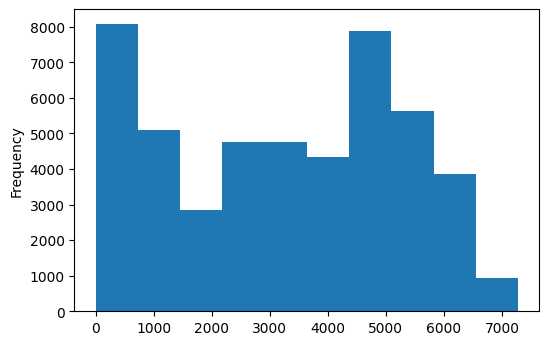

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:000 to 2018-09-30 23:00:00, the hourly traffic volume ranged from 0 to 7,2380 cars, with an average of 3,259 cars. Within the 25th percentile, the traffic volume were only 1,193 cars or less during 25% of the time. However, in the 75th percentile, the traffic volume is 4 times that at 4,933 cars or more.

Since the frequency of the data is by the hour, this observation indicates there is a big influence between daytime data and night time data.


# Traffic Volume: Day vs. Night

Lets separate the data into two categories:

 - Daytime data: 7 a.m. to 7 p.m. (12 hours)
 - Nighttime data: 7 p.m. to 7 a.m. (12 hours)
 
While in reality, this is not a perfect distinction between daytime and nighttime (due to factors such as daylights savings), this is a decent starting point.

In [7]:
import datetime as dt

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)




(23877, 9)
(24327, 9)


# Traffic Volume: Day vs. Night (II)



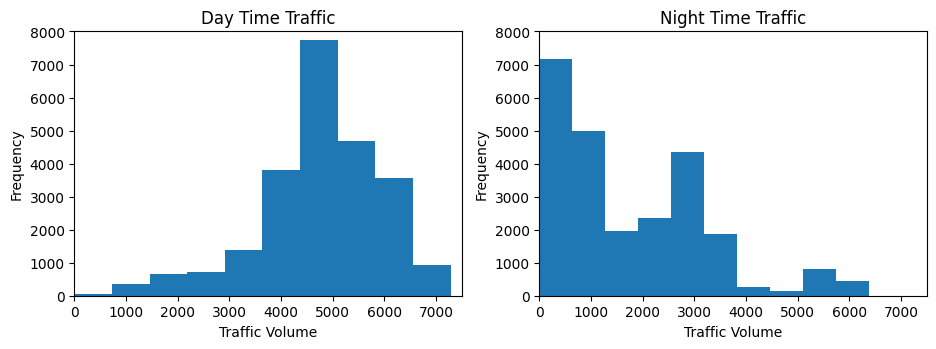

In [8]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Day Time Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Night Time Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

First off, lets explain the axis:

 - The x-axis shows the traffic volume at any given time.
 - The y-axis shows how often a certain amount of traffic volume occurs
 
For instance, in the 'Day Time Traffic' column chart, the traffic volume distribution is skewed to the left. The majority of instances of traffice volume occurs near the higher intervals (right-side) and less traffic volume occurs during the lower intervals (left-side).  

The 'Night Time Traffic' chart is the opposite, the traffic volume distribution is skewed to the right, showing the majority of the traffic volume occuring during the end of the day (remember: the night time hour range is 7 p.m. to 7 a.m.)

If we compare the average traffice volume within the 25, 50, and 75 percentiles, the 'Day Time Traffic' is higher in all the distributions. Hence, we can tell that during the hours of the day, there is far more traffic along I-9 highway.

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

# Analyzing Monthly Traffic Volume

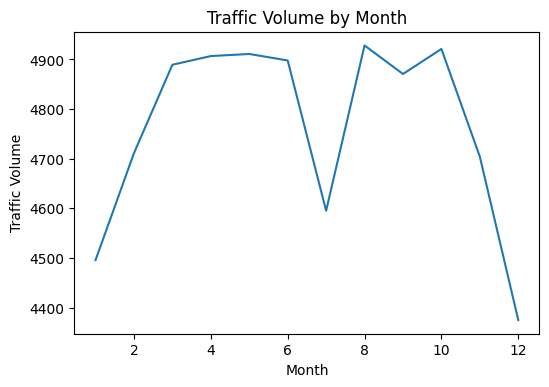

In [14]:
plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

In the line chart above, Traffic Volume by Month, we see that there is some seasonality. Particularly with January, July and December. These months are typically holiday months, so it would not be too much of a stretch to assume that during these months, there will be less cars on the road due to closure of businesses and/or schools. Therefore, a lot less commuting across the highway.


# Analyzing Day of the Week Traffic Volume

In [15]:
# Create new column, 'dayofweek' 
day['dayofweek'] = day['date_time'].dt.dayofweek #extracts day from date_time
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

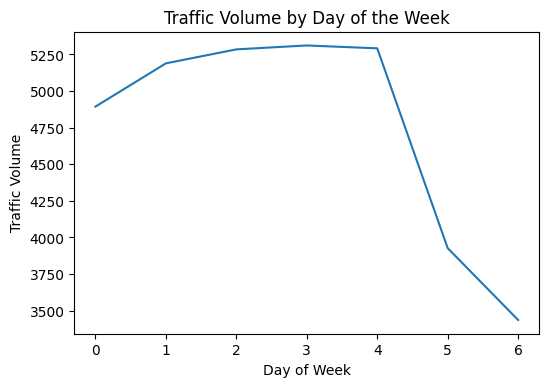

In [16]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.show()

Traffic activity is significantly heavier on business days (Monday - Friday). Except for Monday, we see values over 5,000 during business days. On weekends, traffic is much lighter.

In [17]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 <= Mon-Fri
weekend = day.copy()[day['dayofweek'] >= 5] # 5 & 6 == Saturday & Sunday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


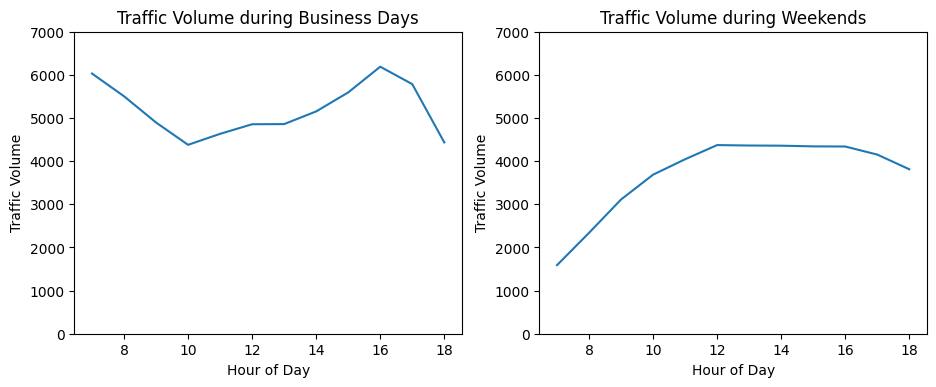

In [20]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume during Business Days')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.ylim(0,7000)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume during Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.ylim(0,7000)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to weekends. On business days, the traffic is heaviest during hours of 7 a.m. to 4 p.m. during rush hours - when most people travel to and from work. We see traffic volumes of 6,000 cars at rush hours.. 

To summarize, we found a few time-related indicators of heavy traffic:

 - The traffic is usually heavier during warm months (March-October) compared to cold months (Novemeber-February).
 - The traffic is usually heavier on business days compared to weekends.
 - On business days, the rush hours are around 7 a.m. and 4 p.m.
 


#  Weather Indicators and Traffic

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, and weather_description.


In [21]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest positive correlation with a value of +0.13. The other columns don't show any strong correlation.

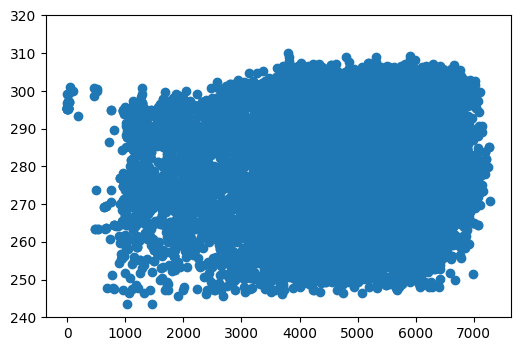

In [24]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(240, 320)
plt.show()

The scatter plot does not show a general trending correlation pattern. We can conclude that temp is not a dependable indicator for traffic volume.

Lets look at weather_main and weather_description columns.


# Weather Types

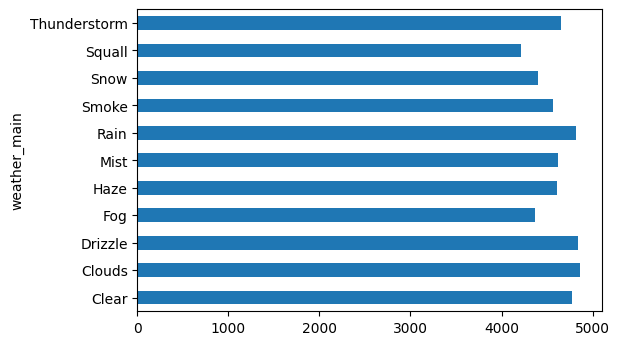

In [29]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It appears that there is no weather type where traffic volume exceed 5,000 cars. This makes finding heavy traffic indicator more difficult. Lets also group by weather_description, which provides more granular details regarding weather classifications:


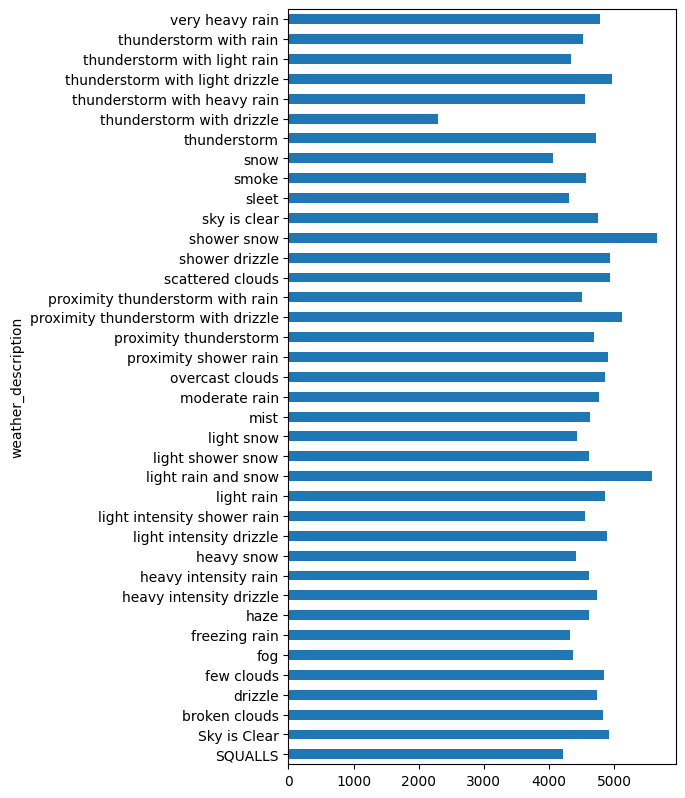

In [35]:
plt.figure(figsize=(5,10))
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh()
plt.show()

There are three weather types where traffic volume exceeds 5,000:

 - shower snow
 - light rain and snow
 - proximity thunderstorm with drizzle
 
It is unclear why these three weather types have the highest average traffic values - these are bad weather types, but not as bad compared to some others. It's possible that during these three weather types, people prefer to use a car instead of walking/biking.

# Conclusion

In this project, we identified a few indicators of heavy traffic along the I-94 interstate highway. There were two significant indicators that affected traffic:

 - Time indicators:
   - Traffic is usually heavier during warm months (March-October) as opposed to cold months (November-February).
   - Traffic is usually heavier on business days compared to the weekends.
   - During business days, the rush hours are around 7 a.m. to 4 p.m.
   
 - Weather indicators:
   - Shower snow
   - Light rain and snow
   - proximity thunderstorm with drizzle